In [1]:
from qsextra import ExcitonicSystem, ChromophoreSystem
from qsextra.tools import spectral_function, unit_converter
from qsextra.spectroscopy import FeynmanDiagram, clspectroscopy
from qsextra.spectroscopy.postprocessing import postprocessing
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt

In [2]:
epsilon = [1.55, 1.46]    # [eV]
J = toeplitz([0., -0.01])    # [eV]
N = len(epsilon)

In [3]:
esys = ExcitonicSystem(energies = epsilon,
                       dipole_moments = [1.] * N,
                       couplings = J,
                      )

eigvals, _ = np.linalg.eig(esys.get_e_Hamiltonian().full())
eigvals -= np.min(eigvals)

In [11]:
dt_fs = 0.1    # [fs]
t_final = 200.    # [fs]
t_list_plot = np.arange(0, t_final + dt_fs, dt_fs)    # [fs]
# Now convert to eV^-1
t_list = unit_converter(t_list_plot, initial_unit = 'fs', final_unit = 'eV-1')    # [eV-1]
dt = t_list[1] - t_list[0]    # [eV-1]
# For the quantum execution we reduce the time list in order to save computational time
times_plot = np.arange(0, t_final + dt_fs, 100 * dt_fs)    # [fs]
times = unit_converter(times_plot, initial_unit = 'fs', final_unit = 'eV-1')    # [eV-1]

three_t_list = [times, [0], times]

In [12]:
Gamma = 59.08 * 10**(-3)

In [13]:
spec = FeynmanDiagram('gsb', three_t_list)

### Exciton System

In [14]:
signal_ex = clspectroscopy(esys, spec, rates=Gamma)

Your real strength comes from being the best "You" you can be. [Po]


In [15]:
freq, spectrum_ex = postprocessing(spec,
                                signal_ex,
                                pad_extension = 3,
                                RF_freq = 1.505,
                               )

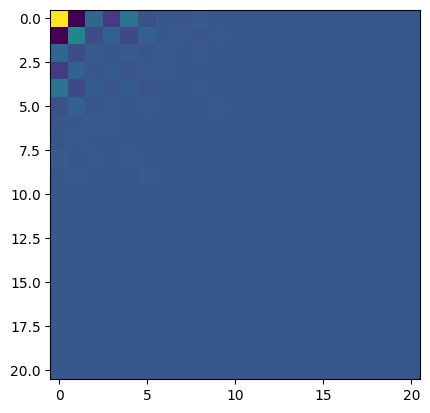

In [16]:
plt.imshow(signal_ex[:,0,:].real)

C:\Users\fede\anaconda3\envs\qsextra_env\Lib\site-packages\matplotlib\contour.py:1568: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
C:\Users\fede\anaconda3\envs\qsextra_env\Lib\site-packages\matplotlib\contour.py:1569: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
C:\Users\fede\anaconda3\envs\qsextra_env\Lib\site-packages\numpy\ma\core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


(1.3, 1.7)

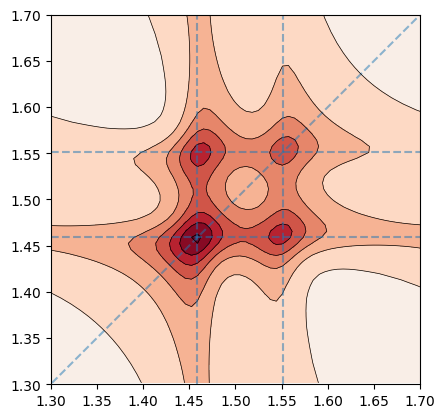

In [10]:
vmin = spectrum_ex.real.min()
vmax = spectrum_ex.real.max()
v = max(np.abs(vmin), vmax)
plt.plot(np.diag(freq[0]), np.diag(freq[1]), linestyle='--', alpha = 0.5)
plt.contour(freq[0], freq[1], spectrum_ex, colors='k', linewidths=0.5, vmin=-v, vmax=v)
plt.contourf(freq[0], freq[1], spectrum_ex, cmap='RdBu_r', vmin=-v, vmax=v)
[plt.axvline(x=eigval.real, linestyle='--', alpha = 0.5) for eigval in eigvals]
[plt.axhline(y=eigval.real, linestyle='--', alpha = 0.5) for eigval in eigvals]
plt.axis('square')
plt.xlim([1.3, 1.7])
plt.ylim([1.3, 1.7])

(1.3, 1.7)

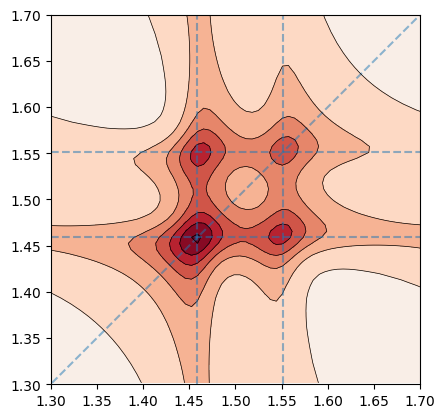

In [17]:
vmin = spectrum_ex.real.min()
vmax = spectrum_ex.real.max()
v = max(np.abs(vmin), vmax)
plt.plot(np.diag(freq[0]), np.diag(freq[1]), linestyle='--', alpha = 0.5)
plt.contour(freq[0], freq[1], spectrum_ex, colors='k', linewidths=0.5, vmin=-v, vmax=v)
plt.contourf(freq[0], freq[1], spectrum_ex, cmap='RdBu_r', vmin=-v, vmax=v)
[plt.axvline(x=eigval.real, linestyle='--', alpha = 0.5) for eigval in eigvals]
[plt.axhline(y=eigval.real, linestyle='--', alpha = 0.5) for eigval in eigvals]
plt.axis('square')
plt.xlim([1.3, 1.7])
plt.ylim([1.3, 1.7])

### Chromophore system

In [12]:
sys = ChromophoreSystem(excitonic_system = esys)

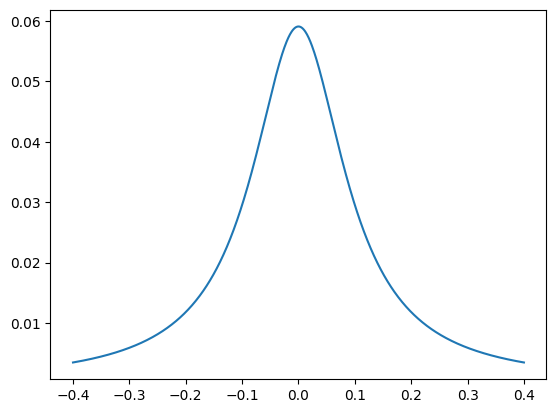

In [19]:
W = 1
frequencies_pseudomode = [0] * W
Gamma_list = [Gamma / W] * W
Omega_list = [0.1] * W
fr, sf = spectral_function(frequencies_pseudomode, Gamma_list, Omega_list)
plt.plot(fr, sf)

In [20]:
sys.pseudomodes(frequencies_pseudomode = frequencies_pseudomode,
                levels_pseudomode = [2]*len(frequencies_pseudomode),
                couplings_ep = np.sqrt(np.array(Gamma_list)*np.array(Omega_list)/2).tolist(),
               )
coll_rate = (2 * np.array(Omega_list)).tolist()

In [21]:
signal_ch = clspectroscopy(sys, spec, rates=coll_rate)

The hardcore do understand. [Tigress]


In [22]:
freq, spectrum_ch = postprocessing(spec,
                                signal_ch,
                                pad_extension = 3,
                                RF_freq = 1.505,
                               )

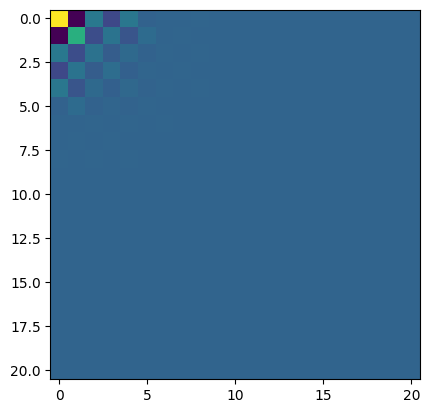

In [23]:
plt.imshow(signal_ch[:,0,:].real)

(1.3, 1.7)

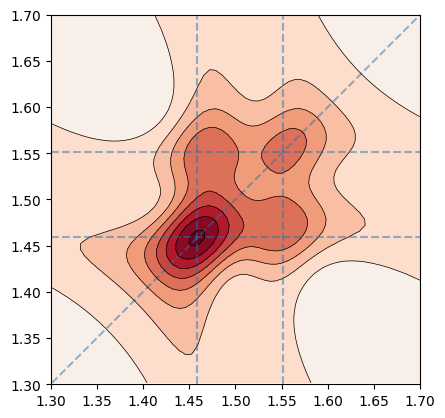

In [27]:
vmin = spectrum_ch.real.min()
vmax = spectrum_ch.real.max()
v = max(np.abs(vmin), vmax)
plt.plot(np.diag(freq[0]), np.diag(freq[1]), linestyle='--', alpha = 0.5)
plt.contour(freq[0], freq[1], spectrum_ch, colors='k', linewidths=0.5, vmin=-v, vmax=v)
plt.contourf(freq[0], freq[1], spectrum_ch, cmap='RdBu_r', vmin=-v, vmax=v)
[plt.axvline(x=eigval.real, linestyle='--', alpha = 0.5) for eigval in eigvals]
[plt.axhline(y=eigval.real, linestyle='--', alpha = 0.5) for eigval in eigvals]
plt.axis('square')
plt.xlim([1.3, 1.7])
plt.ylim([1.3, 1.7])